In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Load dataset
df = pd.read_csv('800-Row_Simulated_ML_Dataset.csv')

In [26]:
# Fill missing values
df['reviewer_std_dev_error'] = df['reviewer_std_dev_error'].fillna(0.0)

In [27]:
# Define features and label
feature_cols = [
    'reviewer_avg_error_all',
    'reviewer_review_count',
    'reviewer_std_dev_error',
    'reviewer_avg_error_on_assign',
    'reviewer_review_count_on_assign'
]

In [28]:
X = df[feature_cols]
y = df['abs_error']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [29]:
# Train the Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [30]:
# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [31]:
# Feature importance
importances = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [32]:
print("\n🌟 Feature Importance:\n", importances)


🌟 Feature Importance:
                            Feature  Importance
3     reviewer_avg_error_on_assign    0.938723
2           reviewer_std_dev_error    0.026023
0           reviewer_avg_error_all    0.015807
1            reviewer_review_count    0.012273
4  reviewer_review_count_on_assign    0.007174


In [33]:
# After training the model
import joblib
joblib.dump(model, 'reviewer_model.pkl')

['reviewer_model.pkl']

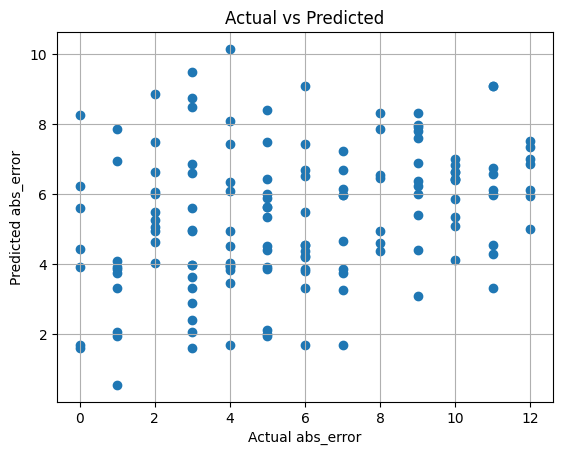

In [34]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual abs_error")
plt.ylabel("Predicted abs_error")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()
